  
# Machine Learning Algorithms for Data Science
## A Practical Approach

#### By Anthony Lorencette, BJ's Membership Analytics Team
<img src="bjs.png" width="23%" align="right">

   # Relevant ML Learning Algorithms

- Supervised Learning Algorithms
    - Support Vector Machines
    - Linear Regression
    - Logistic Regression
    - Naive Bayes
    - Linear Discriminant Analysis
    - Decision Trees and Random Forest
    - K-Nearest Neighbors
    - Neural Networks
- Unsupervised Algorithms
    - Collaborative Filtering with Matrix Factorization (MF)

# Support Vector Machines
####  For Classification, Outlier Detection, or Regression

- The SVM algorithm finds classes of your data by finding a equidistant margin for all created classes (maximal margin).

<img src="svm1.png" width="50%" align="left"> 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

- The SVM algorithm can also be used for regression: $f(x) = \langle w,x \rangle + b \hspace{1 ex}s.t.\hspace{1 ex} \chi,b \in \Re$ <img src="svm2.png" width="30%" align="right"> <br>

    - The linear transformation is found in the image to the right. <br>


*look up feasibility gap*


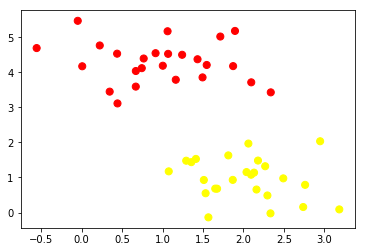

In [2]:
#Support vector machines example using python
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from mlxtend.plotting import plot_decision_regions
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
a = plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')



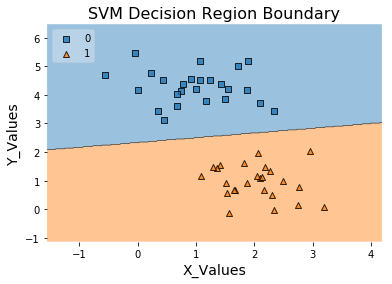

In [3]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
plot_decision_regions(X=X, y=y,clf=model, legend=2);
plt.xlabel("X_Values", size=14);
plt.ylabel("Y_Values", size=14);
plt.title('SVM Decision Region Boundary', size=16);

# Linear Regression ML Algorithms
## A Data Science Perspective


- Our objective function is captured in the *cost function* which is to $\text{min }\frac{1}{n}\Sigma_{i=1}^{n}(pred_{i}-y_{i})^{2} (1)$ where $pred_{i} = \beta_{k}^{'}$
- The method of minimzation most commonly used is called *Gradient Descent* (see below), which uses calculus to find the global minimum of the cost function (1) <img style="float: right;" src="LR1.png" width="20%">
    - $\frac{\partial J}{\partial \beta_{0}} = \frac{2}{n}\Sigma_{i=1}^{n}(\beta_{0}+\beta_{1}\cdot x_{i} - y_{i})\cdot x_{i} \Rightarrow \frac{\partial J}{\partial \beta_{0}} = \frac{2}{n}\Sigma_{i=1}^{n}(pred_{i}-y_{i})$
    - $\frac{\partial J}{\partial \beta_{1}} = \frac{2}{n}\Sigma_{i=1}^{n}(\beta_{0}+\beta_{1}\cdot x_{i} - y_{i})\cdot x_{i} \Rightarrow \frac{\partial J}{\partial \beta_{1}} = \frac{2}{n}\Sigma_{i=1}^{n}(pred_{i}-y_{i})\cdot x_{i}$
- Add in a *hyperparameter* ($\alpha$) to control learning rate (step size).
    - $a_{0} = a_{0} - \alpha \cdot \frac{2}{n}\Sigma_{i=1}^{n}(pred_{i}-y_{i})$
    - $a_{1} = a_{1} - \alpha \cdot \frac{2}{n}\Sigma_{i=1}^{n}(pred_{i}-y_{i}) \cdot x_{i}$
- Ridge Regression: Use when data is multicollinear (near linear relationship between vars): new cost function is $\text{min }\frac{1}{n}\Sigma_{i=1}^{n}(pred_{i}-y_{i})^{2} + \lambda\Sigma_{i=1}^{n}\beta_{k}^{2}$, use cv to tune $\lambda$
- Lasso Regression: Corrects multicollinearity further by effectively deleting highly collinear parameters: new cost function is $\text{min }\frac{1}{n}\Sigma_{i=1}^{n}(pred_{i}-y_{i})^{2} + \lambda\Sigma_{i=1}^{n}|\beta_{k}|$
- Measure accuracy using $R^{2}$

Simply, the cost function says to take the difference between each real data point (y) and our model’s prediction (ŷ), square the differences to avoid negative numbers and penalise larger differences. Finally, add them up and take the average. Except rather than dividing it by n, we divide it by 2*n. This is because mathematicians have decided that it is easier to derive. 

For problems that are 2 dimensional, we can could simply derive the optimal beta parameters that minimise our loss function. However, as the model grows increasingly complex, computing the beta parameters for each variable becomes no longer feasible. As such, a method known as Gradient Descent will be necessary in allowing us to minimise our loss function.

To avoid overfit, use regularisation parameter: Add in a penalty in the loss function for building a model that assigns too much explanatory power to any one feature or allows to many features to be taken into account. New cost function becomes $\text{min }\frac{1}{n}\Sigma_{i=1}^{n}(pred_{i}-y_{i})^{2} + \lambda \Sigma_{i=0}^{1}\beta_{i}^{2}$
    -The lambda coefficient of the regularisation term in the cost function is a hyperparameter: a general setting of your model that can be increased or decreased (i.e. tuned) in order to improve performance. A higher lambda value harshly penalises large beta coefficients that could lead to potential overfitting. To decide on the best value of lambda (λ), you’d use a method known as cross-validation which involves holding our a portion of the training data during training, then seeing how well your model explains the held-out portion. We’ll go over this in more depth in future series'.

Multicollinearity, or collinearity, is the existence of near-linear relationships among the independent variables.
For example, suppose that the three ingredients of a mixture are studied by including their percentages of the
total. These variables will have the (perfect) linear relationship: P1 + P2 + P3 = 100. During regression
calculations, this relationship causes a division by zero which in turn causes the calculations to be aborted. When
the relationship is not exact, the division by zero does not occur and the calculations are not aborted. However,
the division by a very small quantity still distorts the results. Hence, one of the first steps in a regression analysis
is to determine if multicollinearity is a problem. Multicollinearity can create inaccurate estimates of the regression coefficients, inflate the standard errors of the regression coefficients, deflate the partial t-tests for the regression coefficients, give false, nonsignificant, pvalues, and degrade the predictability of the model (and that’s just for starters).

In [4]:
#tips example
import matplotlib.pyplot as plt
from seaborn import load_dataset
df = load_dataset('tips')
import pandas as pd
df.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} ,inplace=True)

C:\Users\adesouza\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


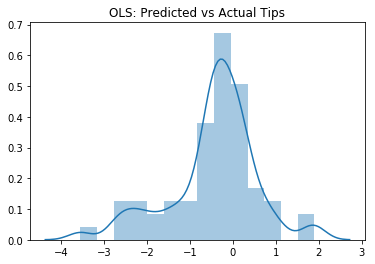

NameError: name 'metrics' is not defined

In [5]:
import seaborn as sb
import numpy as np
X = df[['total_bill','sex','size','smoker']]
Y = df[['tip']]
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=26)
OLS = linear_model.LinearRegression()
OLS.fit(X_train, y_train)
OLSpredictions=OLS.predict(X_test)
sb.distplot(y_test-OLSpredictions)
plt.title("OLS: Predicted vs Actual Tips")
plt.show()
print("R^2 for LS Regression: ", '{:0.3f}'.format(abs(metrics.r2_score(y_test, OLSpredictions))))

lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
lpredictions=lasso.predict(X_test)
lpredictions = np.array(lpredictions).reshape((len(lpredictions), 1))
sb.distplot(y_test-lpredictions)
plt.title("Lasso: Predicted vs Actual Tips")
plt.show()
print("R^2 for Lasso Regression: ", '{:0.3f}'.format(abs(metrics.r2_score(y_test, lpredictions))))

ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
rpredictions=ridge.predict(X_test)
sb.distplot(y_test-rpredictions)
plt.title("Ridge: Predicted vs Actual Tips")
plt.show()
print("R^2 for Ridge Regression: ", '{:0.3f}'.format(abs(metrics.r2_score(y_test, rpredictions))))

#normalize it 

# Logistic Regression ML Algorithms
#### A Very Simple Classification Algorithm

- Probabilities describing the possible outcomes of a single trial are modeled using a logistic function. The cost function for this algorithm is $min -\frac{1}{m}\Sigma_{i=1}^{m}[y^{(i)}log\hspace{1ex} h_{\theta}(x^{(i)})+(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]$ where $h_{\theta}(x) = \frac{1}{1+e^{-\theta^{'}x}}$
- Can do Ridge/Lasso regression to correct for multicollinear parameters too
- Use AIC, Residual Deviance, or Confusion Matrix (see below), and ROC score to test accuracy
  <img src="confusion_matrix_1.png" width="30%" align="right"> 
- Can use polynomial features to better fit the data (e.g. age vs highincome?)


Specificity/True Negative Rate = True Negative/(True Negative + False Positive)
1- Specificity / False Positive Rate = False Positive / (True Negative + False Positive)
AOC finds area under curve for trade off


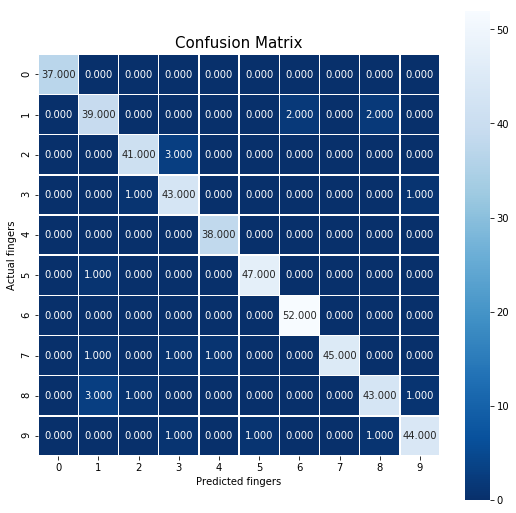

In [57]:
#image processing using logistic regression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

digits = load_digits()
x_train2, x_test2, y_train2, y_test2 = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train2, y_train2)
logisticRegr.predict(x_test2[0].reshape(1,-1))
pred2 = logisticRegr.predict(x_test2);

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test2, pred2)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual fingers');
plt.xlabel('Predicted fingers');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);
#metrics.roc_auc_score(y_score=pred2,y_true=y_test2) #need to look into multiclass auc


# Naive Bayes ML Algorithm
#### A Very Simple Classification Algorithm

- Naive Bayes classifier calculates the probabilities for every factor. Then it selects the outcome with highest probability.
    - This classifier assumes the features are independent. We first calculate P(x1| E) , P(x2 | E) … and then select the test actor x with maximum probability value. Where $P(x1\hspace{1pt} |\hspace{1pt} E) = \frac{P(E\hspace{1pt} |\hspace{1pt} x1)\hspace{1pt}P(x1)}{P(E)}$
- The Gaussian Naive Bayes works for normally distributed features, Multinomial for descrete counts, Bernoulli for binary features.





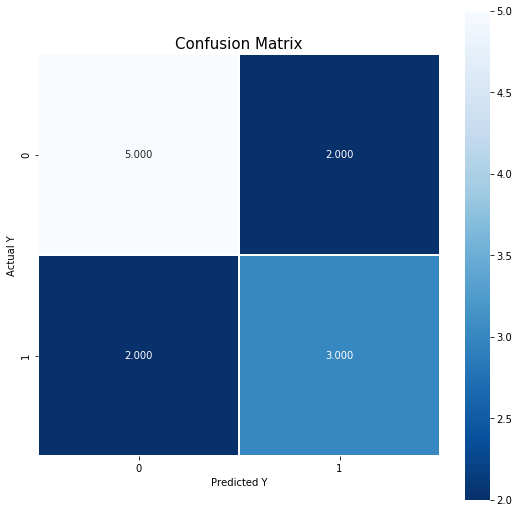

In [68]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

x3= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
Y3 = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])
bayes = GaussianNB()
bayes.fit(x3, Y3)
pred3 = bayes.predict(x3);
cm = metrics.confusion_matrix(Y3, pred3)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Y');
plt.xlabel('Predicted Y');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);


# K-nearest Neighbor (KNN algorithm)

- Simple Classification Algorithm ("Lazy" and Non-parametric)
    - No explicit training phase (KNN does not use training points for generalization, keeps most of training data for test phase)
        - Almost all training data is stored
    - The model structure is determined from the data and the algorithm makes no assumption on the underlying data distribution
        - Useful for non-linear data
- The KNN algorithm is used both for classification and regression predictive problems but is more widely used for classification
- KNN algorithm is based on **feature similarity** i.e how closely out-of-sample features resemble the training set will determine how we classify a given data point
    -  An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors.
    - K is an int chosen by user
        -  A small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive
        - Simple approach to selecting k is to set k = sqrt(n) where n is num of classes
        - It should be as big that noises won't affect the prediction highly. And as low that one factor won't dominate another

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      0.94      0.95        50
          2       0.94      0.96      0.95        50

avg / total       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


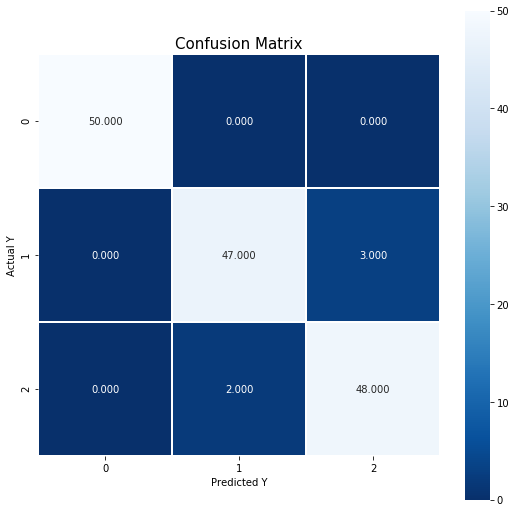

In [13]:
# k-Nearest Neighbor
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sb

# load iris the datasets
dataset = datasets.load_iris()

# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier()
model.fit(dataset.data, dataset.target)
print(model)

# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

#Visualization
cm = metrics.confusion_matrix(expected, predicted);
plt.figure(figsize=(9,9))
sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Y');
plt.xlabel('Predicted Y');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);
plt.show()

# Decision Trees

- Decision trees are a non-parametric supervised learning method used for classification and regression.
- The goal of using decision trees is to create a training model that can be used to predict the value/class of a target variable by learning simple decision rules inferred from the training data.
    - The decision tree algorithm attempts to solve the problem by using **tree representation**
- As with other classifiers, DecisionTreeClassifier two arrays as input: an array X, sparse or dense, of size *(n_samples, n_features)* holding the training samples, and an array Y of integer values, size *(n_samples)*, holding the class labels for the training samples
- After the model is fitted, it can be used to predict the class of samples
    - The probability of each class can also be predicted, which is the fraction of training samples of the same class in a leaf
    

# Decision Trees 

- Building Tree representation
    - Place most valuable attribute of dataset in the **root** of the tree
    - Split the training dataset into **subsets**
        - Subsets should be split such that each subset contains data with the same value for an attribute
    - Repeat steps above on each subset until you find **leaf nodes** in all the branches of the tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


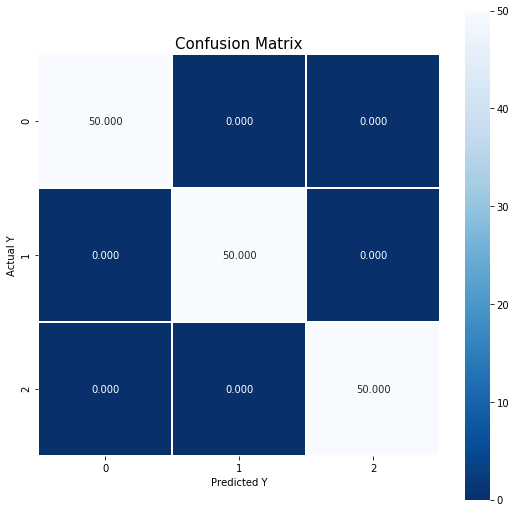

In [11]:
# Decision Tree Classifier
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# load the iris datasets
dataset = datasets.load_iris()

# fit a model to the data
model = DecisionTreeClassifier()
model.fit(dataset.data, dataset.target)
print(model)

# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted));
print(metrics.confusion_matrix(expected, predicted));

cm = metrics.confusion_matrix(expected, predicted);
plt.figure(figsize=(9,9))
sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Y');
plt.xlabel('Predicted Y');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);
plt.show()

In [16]:
from sklearn import tree
from sklearn.datasets import load_iris

clf = tree.DecisionTreeClassifier()
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf,
    out_file='tree.dot')

InvocationException: GraphViz's executables not found